In [3]:
import requests
import json
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation
import time
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_csv('covid-data.csv', index_col='date')
pd.options.display.max_columns = len(data.columns)
data['Brazil']

date
2019-12-31        0
2020-01-01        0
2020-01-02        0
2020-01-03        0
2020-01-04        0
              ...  
2020-07-02    60632
2020-07-03    61884
2020-07-04    63174
2020-07-05    64265
2020-07-06    64867
Name: Brazil, Length: 189, dtype: int64

In [6]:
data = pd.read_csv('total_cases.csv', index_col='date')
pd.options.display.max_columns = len(data.columns)
data['Brazil']

date
2019-12-31          0
2020-01-01          0
2020-01-02          0
2020-01-03          0
2020-01-04          0
               ...   
2020-07-02    1448753
2020-07-03    1496858
2020-07-04    1539081
2020-07-05    1577004
2020-07-06    1603055
Name: Brazil, Length: 189, dtype: int64

In [9]:
data = pd.DataFrame(json.loads(requests.get('https://api.covid19api.com/dayone/country/brazil').content))
dates = pd.to_datetime(data['Date'])
data['Dates'] = dates

data

,ID,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date,Dates
0,5b679794-2952-4c4c-a873-af6ff457b0fd,Brazil,BR,,,,-14.24,-51.93,1,0,0,1,2020-02-26T00:00:00Z,2020-02-26 00:00:00+00:00
1,a832f928-7fc5-4b87-9f25-240412f6ac82,Brazil,BR,,,,-14.24,-51.93,1,0,0,1,2020-02-27T00:00:00Z,2020-02-27 00:00:00+00:00
2,540e68fd-caf1-4f49-98e0-da00dc785621,Brazil,BR,,,,-14.24,-51.93,1,0,0,1,2020-02-28T00:00:00Z,2020-02-28 00:00:00+00:00
3,f007180e-8fbf-4a05-82fe-d531d5e49ea0,Brazil,BR,,,,-14.24,-51.93,2,0,0,2,2020-02-29T00:00:00Z,2020-02-29 00:00:00+00:00
4,175ccaf8-d01d-4631-abb0-9235912aa1cc,Brazil,BR,,,,-14.24,-51.93,2,0,0,2,2020-03-01T00:00:00Z,2020-03-01 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,d3aaaa95-4935-473c-9771-943ab02944b1,Brazil,BR,,,,-14.24,-51.93,13599994,358425,11975121,1266448,2021-04-13T00:00:00Z,2021-04-13 00:00:00+00:00
413,39daf64f-bdcb-4aec-9a4d-c302ea9ad397,Brazil,BR,,,,-14.24,-51.93,13673507,361884,12033880,1277743,2021-04-14T00:00:00Z,2021-04-14 00:00:00+00:00
414,40510926-f437-4470-a480-b11f07e5eadc,Brazil,BR,,,,-14.24,-51.93,13746681,365444,12084851,1296386,2021-04-15T00:00:00Z,2021-04-15 00:00:00+00:00
415,e83226f9-7608-471c-939a-f9eb4a17613b,Brazil,BR,,,,-14.24,-51.93,13832455,368749,12163831,1299875,2021-04-16T00:00:00Z,2021-04-16 00:00:00+00:00


In [16]:
frame = pd.DataFrame({'a': [1, 1, 2, 3, 3, 4, 4, 4], 'b': ['one', 'two', 'one', 'two', 'one', 'two', 'two', 'two'], 'c': np.arange(8)})
frame.drop_duplicates(['a', 'b'], keep='last')

,a,b,c
0,1,one,0
1,1,two,1
2,2,one,2
3,3,two,3
4,3,one,4
7,4,two,7


In [17]:
ages = np.random.randint(1, 80, size=(50))
bins = [0, 18, 40, 60, 80]

ages

array([55,  4, 53, 39, 50, 62, 20, 25, 10, 34, 49, 13, 77, 22, 25, 54, 26,
       36, 31, 18, 37, 41, 62, 60, 36, 30, 76, 48, 39, 62, 19, 47, 51, 64,
       33, 23, 43, 74, 38, 46, 58, 58, 38, 14, 34, 72, 64, 72, 18, 28])

In [18]:
data = pd.cut(ages, bins, labels=['jovem', 'adulto', 'idoso', 'velho'])
counter = data.value_counts()
counter

jovem      6
adulto    20
idoso     14
velho     10
dtype: int64

<IPython.core.display.Javascript object>


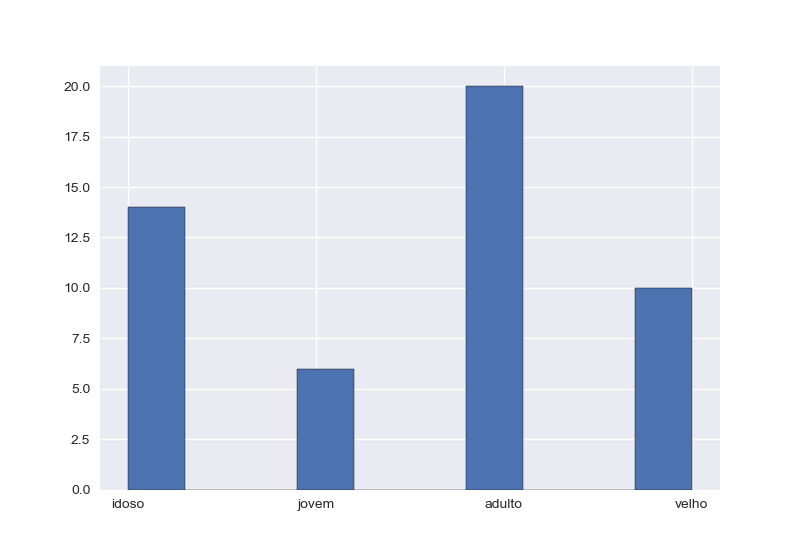

(array([14.,  0.,  0.,  6.,  0.,  0., 20.,  0.,  0., 10.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

In [19]:
plt.style.use('seaborn')

plt.hist(data, edgecolor='black')

In [20]:
data = pd.DataFrame(['a', 'b', 'a', 'd', 'c', 'a', 'e'])
dummies = pd.get_dummies(data[0], prefix='ovo')
data_dummies = data.join(dummies)
data_dummies

,0,ovo_a,ovo_b,ovo_c,ovo_d,ovo_e
0,a,1,0,0,0,0
1,b,0,1,0,0,0
2,a,1,0,0,0,0
3,d,0,0,0,1,0
4,c,0,0,1,0,0
5,a,1,0,0,0,0
6,e,0,0,0,0,1


In [21]:
frame = pd.read_table(r'movies.dat', sep='::', header=None, names=['movie_id', 'title', 'genres'], engine='python')
frame

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [22]:
generos = []
for i in frame['genres']:
    generos.extend(i.split('|'))
    
todos_generos = pd.unique(generos)
dummies = pd.DataFrame(np.zeros((len(frame), len(todos_generos))), columns=todos_generos, dtype='int8')
dummies

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3879,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3880,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3881,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
for i, genre in enumerate(frame['genres']):
    indice = dummies.columns.get_indexer(genre.split('|'))
    dummies.iloc[i, indice] = 1

In [24]:
dummies

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3879,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3880,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3881,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [25]:
filmes_dummie = frame.join(dummies.add_prefix('genre_'))
filmes_dummie.iloc[1]

movie_id                                        2
title                              Jumanji (1995)
genres               Adventure|Children's|Fantasy
genre_Animation                                 0
genre_Children's                                1
genre_Comedy                                    0
genre_Adventure                                 1
genre_Fantasy                                   1
genre_Romance                                   0
genre_Drama                                     0
genre_Action                                    0
genre_Crime                                     0
genre_Thriller                                  0
genre_Horror                                    0
genre_Sci-Fi                                    0
genre_Documentary                               0
genre_War                                       0
genre_Musical                                   0
genre_Mystery                                   0
genre_Film-Noir                                 0


In [11]:
s = ['teste', 'another test' 'aaaaaaaaa']
b = 'Long string'
b.ljust(50, '?')

'Long string???????????????????????????????????????'

<IPython.core.display.Javascript object>


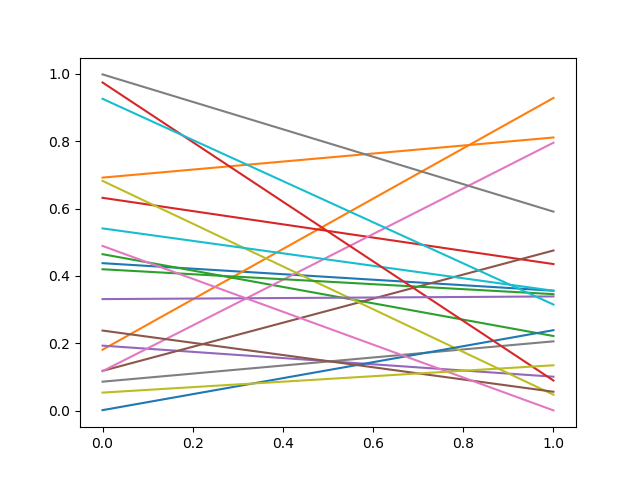

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def on_press(event):
    if event.inaxes is None: return
    for line in event.inaxes.lines:
        if event.key=='t':
            visible = line.get_visible()
            line.set_visible(not visible)
    event.inaxes.figure.canvas.draw()

fig, ax = plt.subplots(1)

fig.canvas.mpl_connect('key_press_event', on_press)

ax.plot(np.random.rand(2, 20))

plt.show()

<IPython.core.display.Javascript object>


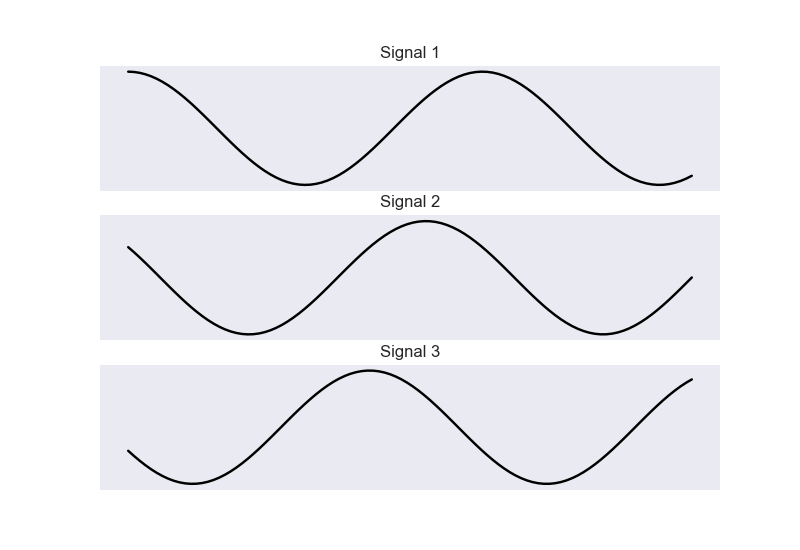

In [29]:
x = np.linspace(0, 10, 100)
y1, y2, y3 = np.cos(x), np.cos(x + 1), np.cos(x + 2) 
names = ['Signal 1', 'Signal 2', 'Signal 3']

fig, ax = plt.subplots(3, 1)
         
for axis, y, name in zip(ax, [y1, y2, y3], names):
    axis.plot(x, y, 'k')
    axis.set(xticks=[], yticks=[], title=name)

<IPython.core.display.Javascript object>


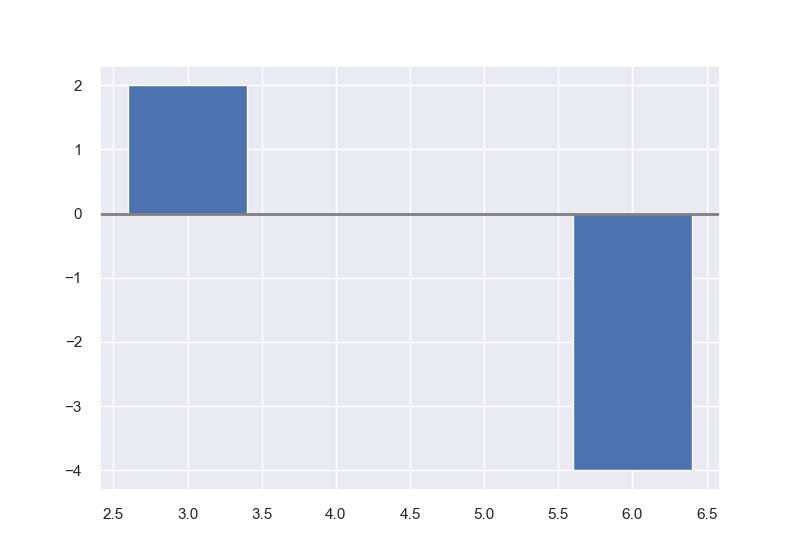

In [19]:
plt.figure()
np.random.seed(1)
a = plt.bar([3, 6], [2, -4], align='center')
plt.axhline(0, color='gray', linewidth=2)

<IPython.core.display.Javascript object>


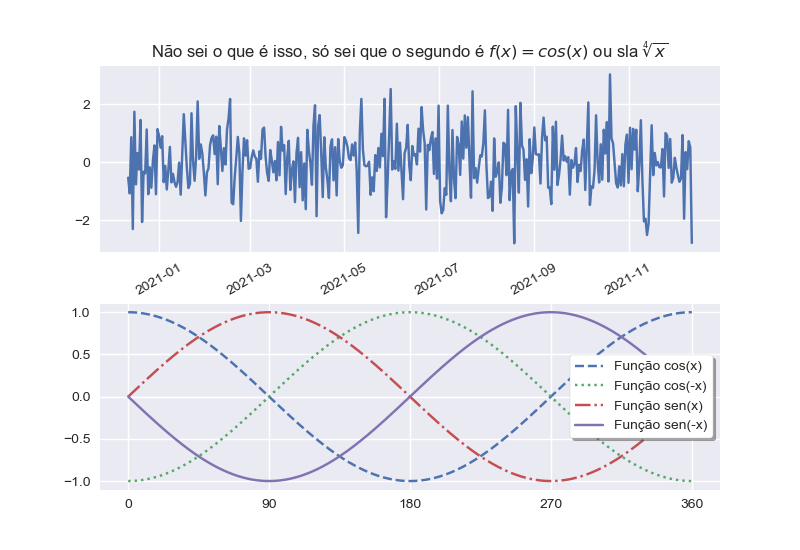

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


In [31]:
fig, ax = plt.subplots(nrows=2, ncols=1)

datas = pd.date_range('2020-12-12', '2021-12-12')
x = np.arange(0, 361)
y1 = np.cos(np.radians(x))
y2 = np.sin(np.radians(x))
y = np.random.randn(366)


ax[0].plot_date(datas, y, linestyle='solid', marker='')
ax[1].plot(x, y1, label='Função cos(x)', linestyle='--')
ax[1].plot(x, -y1, label='Função cos(-x)', linestyle=':')
ax[1].plot(x, y2, label='Função sen(x)', linestyle='-.')
ax[1].plot(x, -y2, label='Função sen(-x)', linestyle='-')

plt.subplots_adjust(hspace=0.28)

for i in ax[0].xaxis.get_ticklabels():
    i.set_rotation(30)   
    
ax[1].set(xticks=[0, 90, 180, 270, 360])

ax[0].set_title('Não sei o que é isso, só sei que o segundo é $f(x) = cos(x)$ ou sla $\sqrt[4]{x}$')
ax[1].legend(frameon=True, facecolor='white', shadow=True)

plt.style.use('seaborn')

<IPython.core.display.Javascript object>


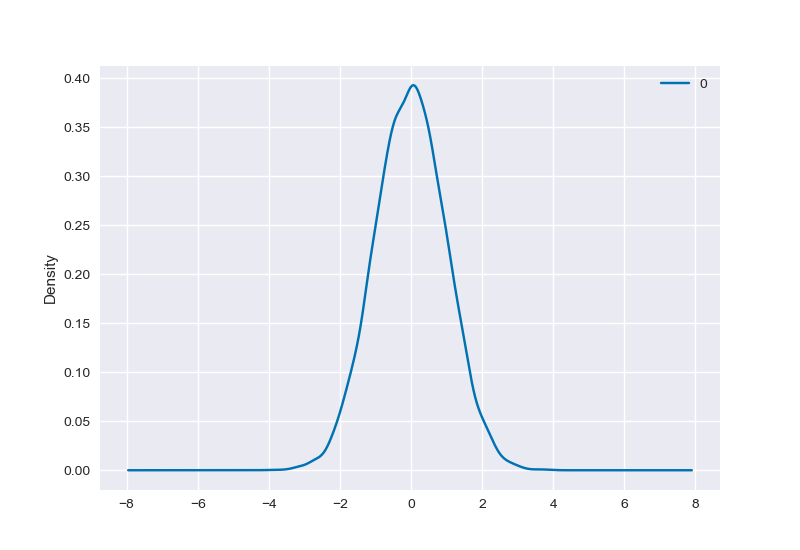

In [21]:
a = np.random.normal(size=10000, loc=0, scale=1)
b = pd.DataFrame(a)
b.plot.kde()

<IPython.core.display.Javascript object>


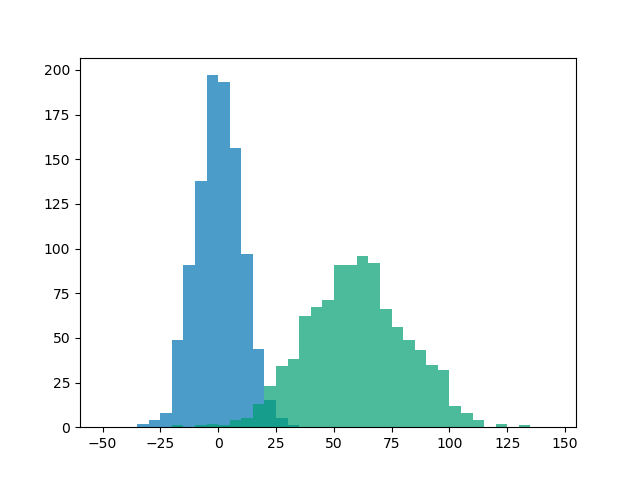

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  2.,  1.,  4.,  5.,
        13., 23., 34., 38., 62., 67., 71., 91., 91., 96., 92., 66., 56.,
        49., 43., 35., 32., 12.,  8.,  4.,  0.,  2.,  0.,  1.,  0.,  0.]),
 array([-50, -45, -40, -35, -30, -25, -20, -15, -10,  -5,   0,   5,  10,
         15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,  75,
         80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130, 135, 140,
        145]),
 <a list of 39 Patch objects>)

In [3]:
v1 = np.random.normal(0, 10, 1000)
v2 = 2*v1 + np.random.normal(60, 10, 1000)
plt.style.use('seaborn-colorblind')
plt.hist(v1, bins=np.arange(-50, 150, 5), alpha=0.7)
plt.hist(v2, bins=np.arange(-50, 150, 5), alpha=0.7)

<IPython.core.display.Javascript object>


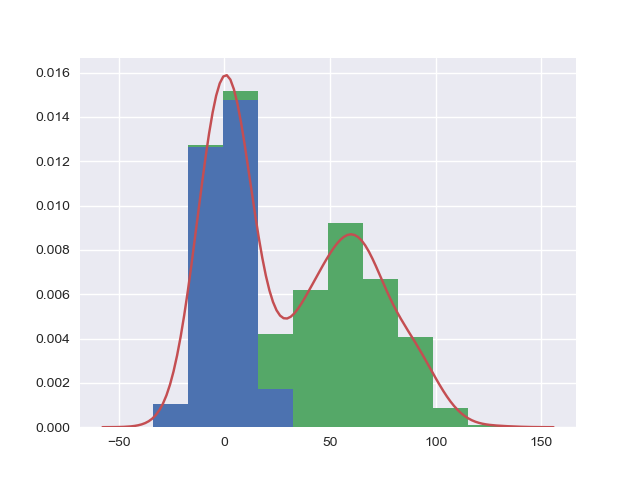

In [4]:
plt.figure()
plt.style.use('seaborn')
plt.hist([v1, v2], density=True, histtype='barstacked')
v3 = np.concatenate((v1, v2))
sns.kdeplot(v3)

<IPython.core.display.Javascript object>


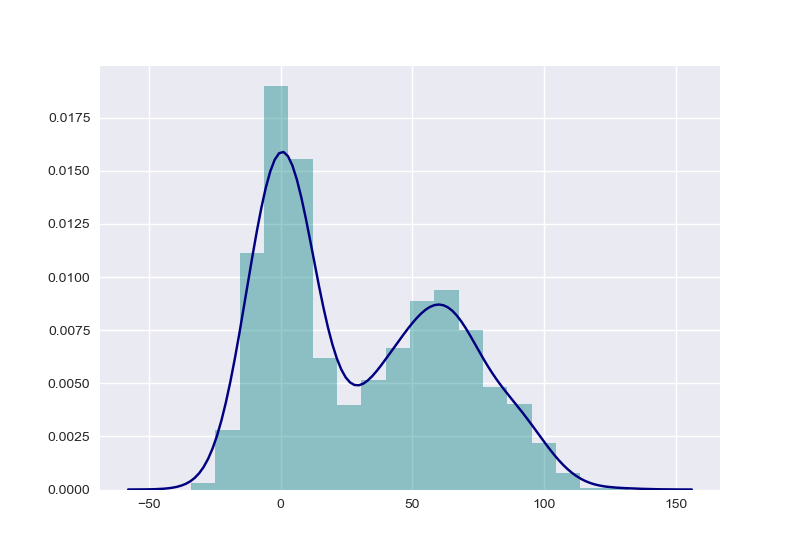

In [5]:
plt.figure()
sns.distplot(v3, hist_kws={'color': 'teal'}, kde_kws={'color': 'navy'})

<IPython.core.display.Javascript object>


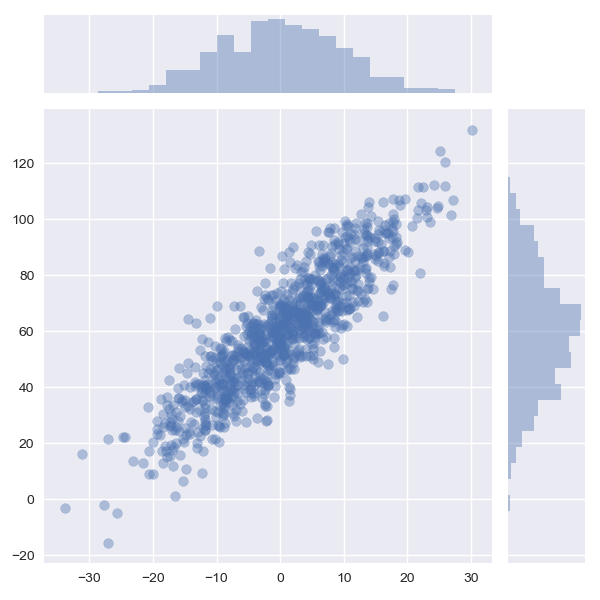

In [6]:
plot = sns.jointplot(v1, v2, alpha=0.4)

<IPython.core.display.Javascript object>


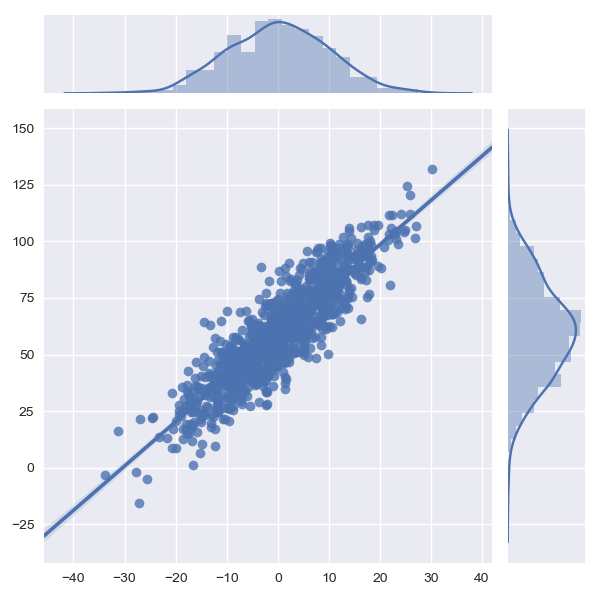

In [7]:
plot = sns.jointplot(v1, v2, kind='reg')

<IPython.core.display.Javascript object>


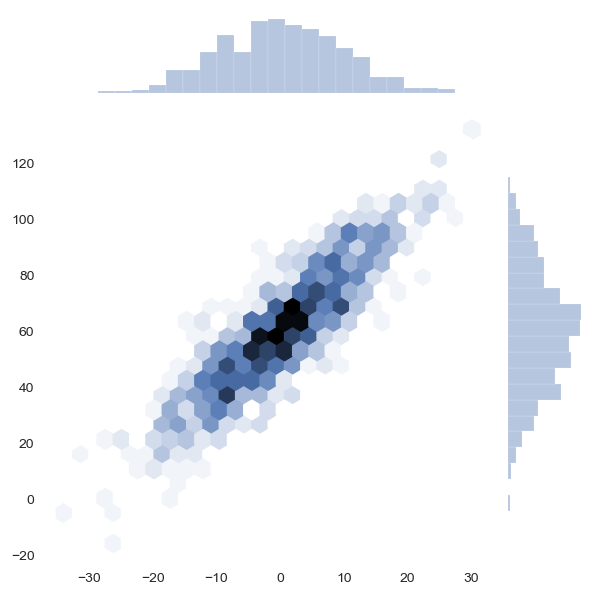

In [8]:
sns.set_style('white')
plot = sns.jointplot(v1, v2, kind='hex')

<IPython.core.display.Javascript object>


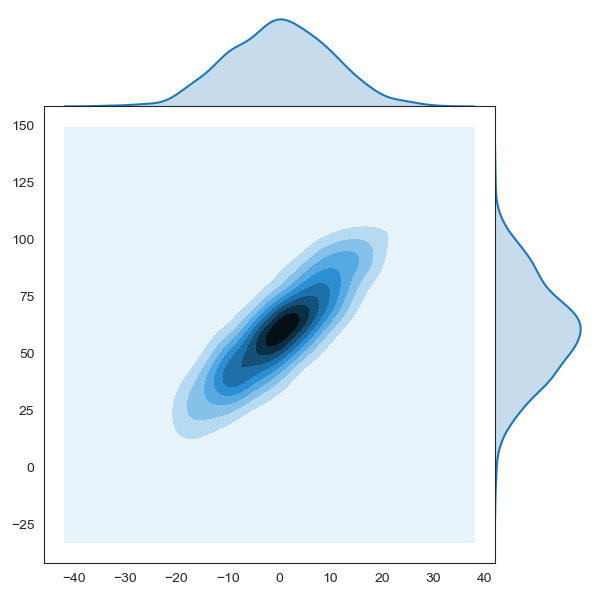

In [9]:
plt.style.use('default')
sns.set_style('white')
sns.jointplot(v1, v2, kind='kde', space=0)

<IPython.core.display.Javascript object>


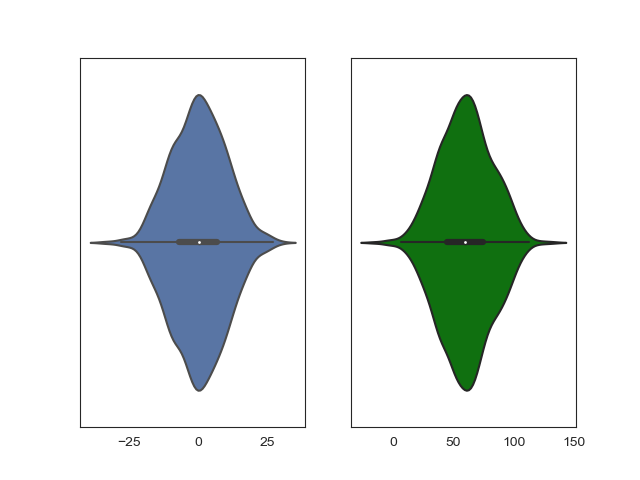

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2)
plt.style.use('seaborn')
sns.set()
sns.violinplot(v1, ax=ax[0])
sns.violinplot(v2, ax=ax[1], color='green')

In [12]:
pd.read_excel(r'C:\Users\Lucas&Matheus\exemples\matplotlib\Contratos_Covid.xlsx', sheet_name='Contratos_Covid', na_values=0)

,Valor Total Contrato,Insumo,EMPRESA,CNPJ,Nº CONTRATO,Prazo (180 Dias),Nº Processo SEI
0,391000,Álcool gel 70% de 500ml,S.M. GUIMARÃES EIRELI - QUALITY,26.889.274/0001-77,40/2020,2020-08-29 00:00:00,25000.020637/2020-03
1,124000,Álcool gel 70% de 100ml,INDALABOR INDAIÁ LABORATÓRIOS FARMACÊUTICOS LTDA,04.654.861/0001-44,41/2020,2020-08-29 00:00:00,25000.020637/2020-03
2,51800,"Cloreto de sódio , Suplemento para cultura",REAGEN PRODUTOS PARA LABORATÓRIOS LTDA,82.075.748/0001-18,42/2020,2020-08-30 00:00:00,25000.020637/2020-03
3,310000,Óculos proteção,JOÃOMED COMÉRCIO DE MATERIAIS CIRÚRGICOS S/A,78.742.491/0001-33,43/2020,2020-08-31 00:00:00,25000.020637/2020-03
4,2280000,"Luva sem látex TAM: P, M e G",NACIONAL COMÉRCIO HOSPITALAR S/A,52.202.744/0001-92,44/2020,2020-08-29 00:00:00,25000.015844/2020-38
5,2040000,"Luva sem látex TAM: P, M e G",FUTURA DISTRIBUIDORA DE MEDICAMENTOS E PRODUTO...,17.700.763/0001-48,45/2020,2020-08-29 00:00:00,25000.015844/2020-38
6,7000,Sapatilha,SALES EQUIPAMENTOS E PRODUTOS DE HIGIENE PROFI...,10.290.557/0001-68,46/2020,2020-08-29 00:00:00,25000.038360/2020-67
7,36000,Swab,MACMED SOLUÇÕES EM SAÚDE LTDA,31.085.156/0001-46,47/2020,2020-08-30 00:00:00,25000.015844/2020-38
8,23400,Tubo tipo Falcon,"CAPITAL MEDH IMPORTAÇÃO, DISTRIBUIÇÃO E REPRES...",24.702.356/0001-35,48/2020,2020-08-29 00:00:00,25000.015844/2020-38
9,1680000,Touca hospitalar,ROCHA LOPES REPRESENTAÇÃO E COMÉRCIO DE PRODUT...,19.072.588/0001-17,49/2020,2020-08-31 00:00:00,25000.036227/2020-76


<IPython.core.display.Javascript object>


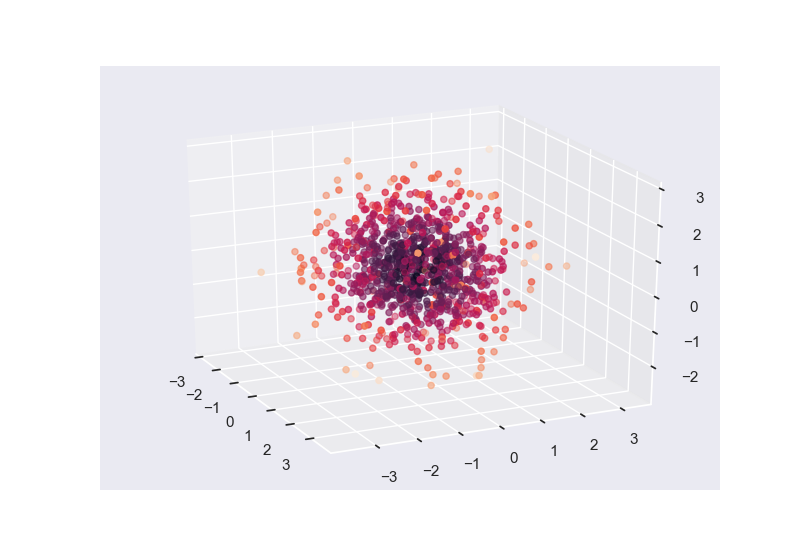

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.random.normal(loc=0, scale=1, size=1000)
y = np.random.normal(loc=0, scale=1, size=1000)
z = np.random.normal(loc=0, scale=1, size=1000)

ax.scatter(x, y, z, c=np.linalg.norm([x, y, z], axis=0))

In [6]:
"""A total of 4,314 other weather extremes events within 50 miles of Ann Arbor, MI were recorded from 1950 to 2010.
The following is a break down of these events"""
pd.read_html(r'http://www.usa.com/ann-arbor-mi-natural-disasters-extremes.htm')[3]

,0,1,2,3,4,5,6,7,8,9
0,Type,Count,Type,Count,Type,Count,Type,Count,Type,Count
1,Avalanche:,0,Blizzard:,5,Cold:,19,Dense Fog:,3,Drought:,2
2,Dust Storm:,0,Flood:,207,Hail:,1124,Heat:,12,Heavy Snow:,105
3,High Surf:,0,Hurricane:,0,Ice Storm:,14,Landslide:,0,Strong Wind:,45
4,Thunderstorm Winds:,2494,Tropical Storm:,0,Wildfire:,2,Winter Storm:,69,Winter Weather:,9
5,Other:,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
"A total of 102 historical tornado events that had recorded magnitude of 2 or above found in or near Ann Arbor, MI."
data = pd.read_html(r'http://www.usa.com/ann-arbor-mi-natural-disasters-extremes.htm', header=0)[4]
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

data.sort_index(inplace=True)
data

,Distance (miles),Magnitude,Start Lat/Log,End Lat/Log,Length,Width,Fatalities,Injuries,Property Damage,Crop Damage,Affected County
Date,,,,,,,,,,,
1951-05-03,33.9,2,42°42'N / 84°03'W,42°44'N / 84°00'W,2.30 Miles,150 Yards,0,0,250K,0,Livingston
1951-07-21,12.7,2,42°09'N / 83°33'W,NaN,0.50 Mile,217 Yards,0,0,25K,0,Washtenaw
1953-06-08,26.0,3,42°36'N / 83°41'W,42°41'N / 83°32'W,9.10 Miles,200 Yards,0,4,2.5M,0,Oakland
1953-06-08,35.9,4,41°47'N / 83°34'W,41°47'N / 83°27'W,5.40 Miles,200 Yards,4,18,250K,0,Monroe
1953-06-08,21.9,3,42°35'N / 83°42'W,42°36'N / 83°41'W,NaN,NaN,0,7,2.5M,0,Livingston
...,...,...,...,...,...,...,...,...,...,...,...
NaT,NaN,Brief Description: A tornado developed near Ha...,Brief Description: A tornado developed near Ha...,Brief Description: A tornado developed near Ha...,Brief Description: A tornado developed near Ha...,Brief Description: A tornado developed near Ha...,Brief Description: A tornado developed near Ha...,Brief Description: A tornado developed near Ha...,Brief Description: A tornado developed near Ha...,Brief Description: A tornado developed near Ha...,Brief Description: A tornado developed near Ha...
NaT,NaN,Brief Description: EVENT NARRATIVE: This torna...,Brief Description: EVENT NARRATIVE: This torna...,Brief Description: EVENT NARRATIVE: This torna...,Brief Description: EVENT NARRATIVE: This torna...,Brief Description: EVENT NARRATIVE: This torna...,Brief Description: EVENT NARRATIVE: This torna...,Brief Description: EVENT NARRATIVE: This torna...,Brief Description: EVENT NARRATIVE: This torna...,Brief Description: EVENT NARRATIVE: This torna...,Brief Description: EVENT NARRATIVE: This torna...
NaT,NaN,Brief Description: A F2 tornado struck eastern...,Brief Description: A F2 tornado struck eastern...,Brief Description: A F2 tornado struck eastern...,Brief Description: A F2 tornado struck eastern...,Brief Description: A F2 tornado struck eastern...,Brief Description: A F2 tornado struck eastern...,Brief Description: A F2 tornado struck eastern...,Brief Description: A F2 tornado struck eastern...,Brief Description: A F2 tornado struck eastern...,Brief Description: A F2 tornado struck eastern...


In [4]:
data = pd.read_html(r'https://en.wikipedia.org/wiki/Detroit')[5]
data = data.droplevel(level=0, axis=1)
data.drop([14], inplace=True)
data.set_index('Month', inplace=True)
data

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
Month,,,,,,,,,,,,,
Record high °F (°C),67(19),70(21),86(30),89(32),95(35),104(40),105(41),104(40),100(38),92(33),81(27),69(21),105(41)
Mean maximum °F (°C),51.2(10.7),54.6(12.6),70.4(21.3),80.1(26.7),85.8(29.9),92.2(33.4),93.4(34.1),92.0(33.3),88.3(31.3),79.7(26.5),67.2(19.6),54.4(12.4),95.1(35.1)
Average high °F (°C),32.0(0.0),35.2(1.8),45.8(7.7),59.1(15.1),69.9(21.1),79.3(26.3),83.4(28.6),81.4(27.4),74.0(23.3),61.6(16.4),48.8(9.3),36.1(2.3),59.0(15.0)
Average low °F (°C),19.1(−7.2),21.0(−6.1),28.6(−1.9),39.4(4.1),49.4(9.7),59.5(15.3),63.9(17.7),62.6(17.0),54.7(12.6),43.3(6.3),34.3(1.3),24.1(−4.4),41.8(5.4)
Mean minimum °F (°C),−1.2(−18.4),2.9(−16.2),10.9(−11.7),24.5(−4.2),35.7(2.1),45.8(7.7),52.2(11.2),51.2(10.7),39.8(4.3),29.7(−1.3),19.7(−6.8),5.4(−14.8),−5.1(−20.6)
Record low °F (°C),−21(−29),−20(−29),−4(−20),8(−13),25(−4),36(2),42(6),38(3),29(−2),17(−8),0(−18),−11(−24),−21(−29)
Average precipitation inches (mm),1.96(50),2.02(51),2.28(58),2.90(74),3.38(86),3.52(89),3.37(86),3.00(76),3.27(83),2.52(64),2.79(71),2.46(62),33.47(850)
Average snowfall inches (cm),12.5(32),10.2(26),6.9(18),1.7(4.3),trace,0(0),0(0),0(0),0(0),0.1(0.25),1.5(3.8),9.6(24),42.5(108)
Average precipitation days (≥ 0.01 in),13.1,10.6,11.7,12.2,12.1,10.2,10.4,9.6,9.5,9.8,11.6,13.7,134.5


<IPython.core.display.Javascript object>


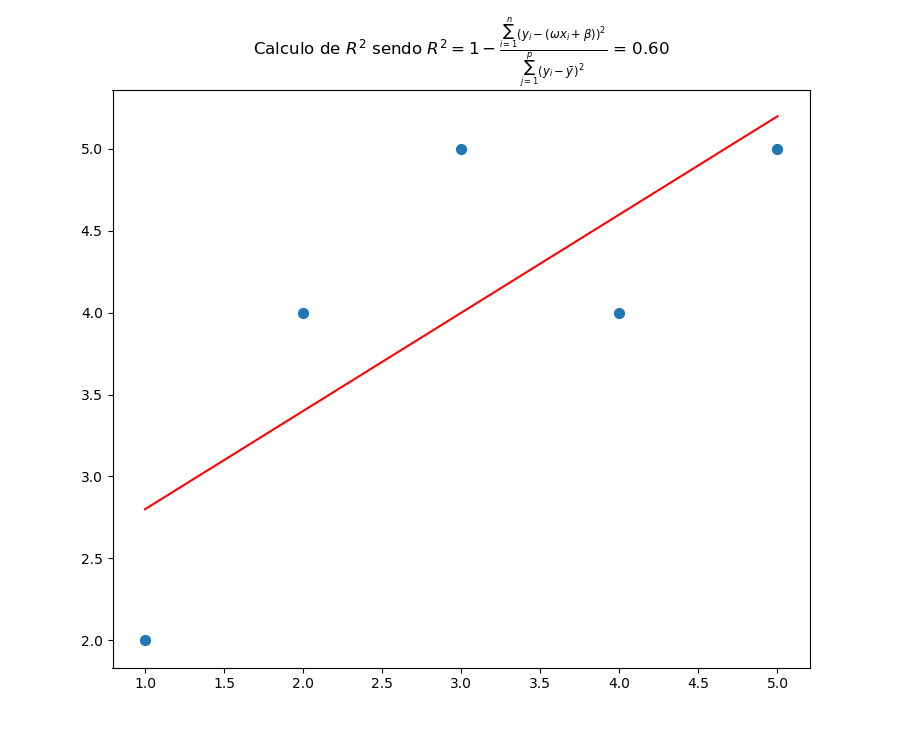

Text(0.5, 1.0, 'Calculo de $R^2$ sendo $R^2 = 1 - \\frac{\\sum_{i=1}^n (y_i - (\\omega x_i + \\beta))^2}{\\sum_{j=1}^p (y_i - \\bar y)^2}$ = 0.60')

In [8]:
from sklearn.datasets import make_regression

plt.figure(figsize=(9, 7.5))
X_R1 = [[1], [2], [3], [4], [5]]
y_R1 = [[2], [4], [5], [4], [5]]

plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

regression = LinearRegression()
regression.fit(X_R1, y_R1)

plt.plot(X_R1, regression.coef_ * X_R1 + regression.intercept_, 'r-')
plt.title(r'Calculo de $R^2$ sendo $R^2 = 1 - \frac{\sum_{i=1}^n (y_i - (\omega x_i + \beta))^2}{\sum_{j=1}^p (y_i - \bar y)^2}$ = ' + f'{regression.score(X_R1, y_R1):.2f}')

In [5]:
a = [i[0] for i in y_R1]
b = [i[0] for i in X_R1]

varmean = sum(list(map(lambda y: (y - np.array(a).mean()) ** 2, a)))
varline = [(j - (regression.coef_ * b[i] + regression.intercept_)) ** 2 for i, j in enumerate(a)]
    
r2 = f'The R^2 is {1 - float(sum(varline)) / varmean:.2f}'
r2

'The R^2 is 0.60'

In [6]:
def quadrado(x):
    return x ** 2

sigmaxy = sum([x * y for x, y in zip(b, a)])
sumofsums = sum(b) * sum(a)
squaresofsum = sum(b) ** 2
sumofsquares = sum(list(map(quadrado, b)))

m = (len(a) * sigmaxy - sumofsums) / (len(a) * sumofsquares - squaresofsum)
linear_coef = (sum(a) - m * sum(b)) / len(a)

print(f'm is {m} and b is {linear_coef}')

m is 0.6 and b is 2.2
